In [2]:
from os import path
import pandas as pd
import numpy as np
import importlib

# setting path
import os, sys
current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

from source.utils.probing_tasks_utils import *
from source.load_data.wdc.load_wdc_dataset import EnglishDatasetLoader
from source.utils.levenshtein_distance import compute_lev_dist_for_pairs
from source.emb_extr_res.emb_extr_res import get_embeddings_df
from source.utils.visualization import plot_histogram
from source.probing.similarity_pairs_probing.get_data import get_pair_similarity_probing_task_df
from config import TYPE, SIZE, EMBEDDING_PATH_PROBING, DATA_PATH, MODEL_TYPE, EMBEDDING_PATH_RAW, REPO_PATH
from source.emb_extr_res.emb_extr_res import get_embeddings_df, get_pairs_similarity_df, get_pretrain_agg_similarity
from source.load_data.wdc.load_wdc_dataset import EnglishDatasetLoader
from source.probing.brand_names import prepare_brands_list, brands_in_title_check, prepare_new_dataset, drop_brands
from source.probing.length import prepare_probing_len
from source.probing.words import words_in_title_check
from source.probing.load_data import load_files_probing_tasks
from source.probing.testing import test_visualize_probing_task

In [3]:
print("TYPE:", TYPE)
print("SIZE:", SIZE)
print("MODEL:", MODEL_TYPE)

TYPE: cameras
SIZE: medium
MODEL: pre_trained


In [ ]:
train_embeddings_path, embedding_train_df, train_df = load_files_probing_tasks(EMBEDDING_PATH_RAW, DATA_PATH, TYPE, SIZE)

# Probing Task: Keywords in Title

In [ ]:
key_words_computers = ['computer', 'laptop', 'processor', 'gpu', 'cpu', 'hdd', 'ssd', 'memory']

key_words_cameras = ['camera', 'lens', 'digit']

key_words_natural = ["what", "which", "who", "why"]

if TYPE == "cameras":
    key_words = key_words_cameras
elif TYPE == "computers":
    key_words = key_words_computers
elif TYPE == "natural":
    key_words = key_words_natural

df_words = words_in_title_check(train_df, key_words)
df_words['keywords_in_title'].value_counts()

## Name Entity Recognition

In [ ]:
if TYPE == "natural":
    # df_words.drop(["keywords_in_title"], axis = 1).to_csv(os.path.join(DATA_PATH, 'df_raw_all_titles.csv'), index = False)
    df_words = pd.read_csv(os.path.join(DATA_PATH, "df_raw_all_titles_named_entity.csv"))
    df_words = df_words.rename({"label" : "keywords_in_title"}, axis=1)

In [ ]:
df_probing_key_words = pd.merge(df_words[["id", "keywords_in_title" ]], embedding_train_df, left_on = "id", right_on = 'id')
df_probing_key_words = df_probing_key_words.rename({"keywords_in_title" : "label"}, axis=1)
df_probing_key_words = df_probing_key_words.drop("id", axis=1)

# save dataframe to train probing task - keywords

# df_probing_key_words.to_csv(os.path.join(EMBEDDING_PATH_PROBING, 'df_probing_key_words.csv'), index = False)

df_probing_key_words.to_csv(os.path.join(EMBEDDING_PATH_PROBING, 'df_probing_key_words_NER.csv'), index = False)

In [ ]:
a = pd.read_csv(os.path.join(EMBEDDING_PATH_PROBING, 'df_probing_key_words_NER.csv'))

Accuracy: 0.7724550898203593, f_score: 0.7686562376052821
Accuracy: 0.8275449101796407, f_score: 0.8249842800251521
Accuracy: 0.792814371257485, f_score: 0.7906961918022977


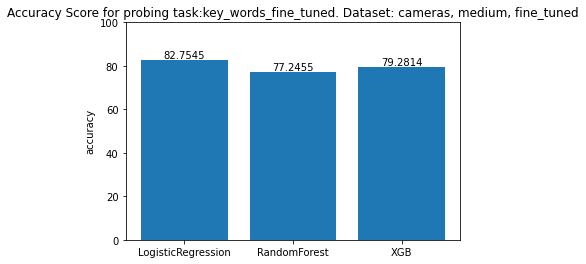

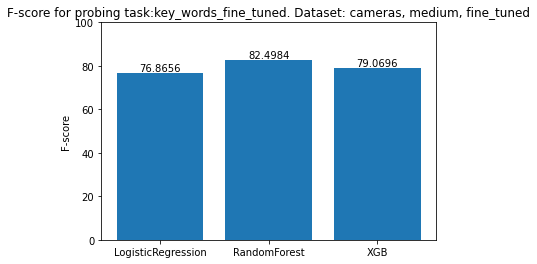

In [3]:
test_visualize_probing_task(
    "df_probing_key_words.csv", "key_words_fine_tuned", EMBEDDING_PATH_PROBING, REPO_PATH, TYPE, SIZE, MODEL_TYPE)

Accuracy: 0.9221556886227545, f_score: 0.9204002645747078
Accuracy: 0.9389221556886228, f_score: 0.9381715863703084
Accuracy: 0.9461077844311377, f_score: 0.9453858888473843


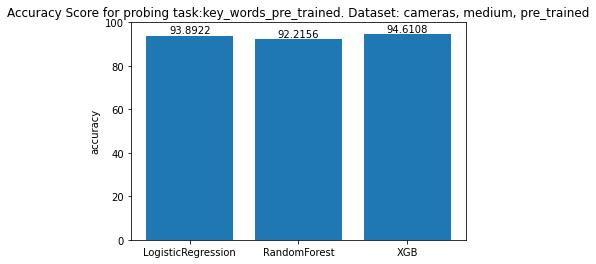

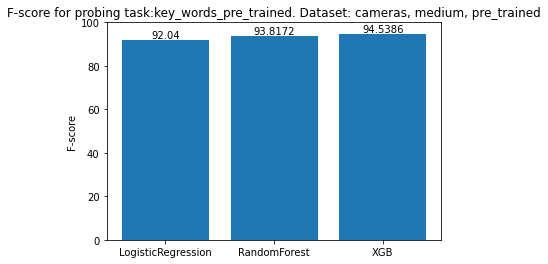

In [4]:
test_visualize_probing_task(
    "df_probing_key_words.csv", "key_words_pre_trained", EMBEDDING_PATH_PROBING, REPO_PATH, TYPE, SIZE, MODEL_TYPE)